# Graphs (Matplotlib)

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

=============

[Matplotlib](http://matplotlib.org/) is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Usually we import `matplotlib` as follows:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

This allows inline graphics in IPython (Jupyter) notebooks and imports functions nessesary for ploting as `plt`. In addition we import `numpy` as `np`.

Let's prepare some data:

In [2]:
x = np.linspace(0,10,20)
y = x ** 2

Plot is as easy as this:

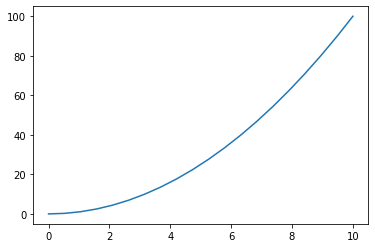

In [3]:
plt.plot(x,y);

Line style and labels are controlled in a way similar to Matlab:

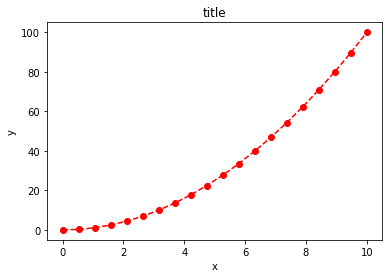

In [4]:
plt.plot(x, y, 'r--o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title');

You can plot several individual lines at once:

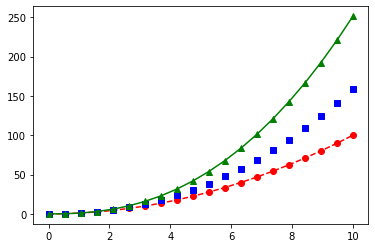

In [5]:
plt.plot(x, y, 'r--o')
plt.plot(x, y ** 1.1, 'bs')
plt.plot(x, y ** 1.2, 'g^-')

## Exercise

- plot sine (np.sin())
- plot sine abd cosine on one plot
- make sine thicker (linewidth=5) and sine dashed

### Alternatives

- [Bokeh](http://bokeh.pydata.org/)
- [plot.ly](http://plot.ly)
- [holoviews](http://holoviews.org/)
- [ggplot](http://ggplot.yhathq.com/)


One more example:

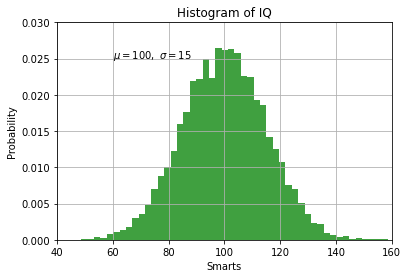

In [6]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

If you feel a bit playful (only in matplotlib > 1.3):

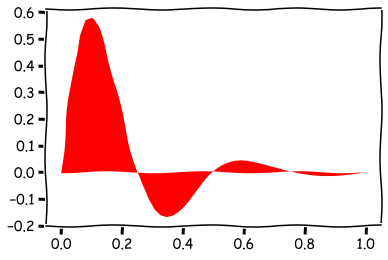

In [7]:
with plt.xkcd():
    x = np.linspace(0, 1)
    y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

    plt.fill(x, y, 'r')
    plt.grid(False)

Following example is from [matplotlib - 2D and 3D plotting in Python](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) - great place to start for people interested in matplotlib.


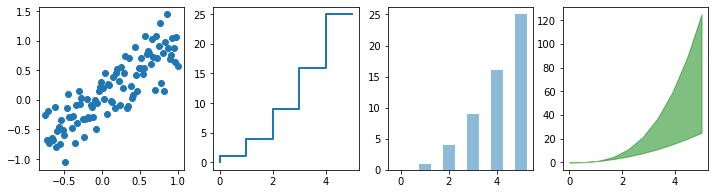

In [8]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)
x = np.linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

When you going to plot something more or less complicated in Matplotlib, the first thing you do is open the [Matplotlib example gallery](http://matplotlib.org/gallery.html) and choose example closest to your case.

You can directly load python code (or basically any text file) to the notebook. This time we download code from the Matplotlib example gallery:

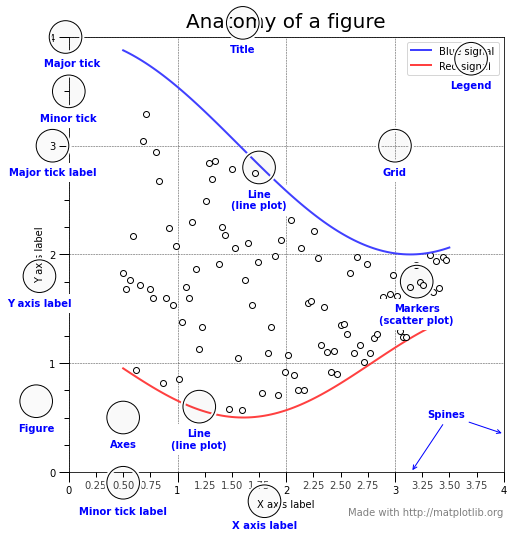

In [9]:
# %load https://matplotlib.org/mpl_examples/showcase/anatomy.py
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()
